In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

575

In [6]:
import requests

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=694d2c62515cf151db30f9d4ff1cb366


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list (6.2.6)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                    
    # If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port macquarie
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | bar harbor
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | kracheh
City not found. Skipping...
Processing Record 6 of Set 1 | giyani
Processing Record 7 of Set 1 | yemtsa
Processing Record 8 of Set 1 | aripuana
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | nuuk
Processing Record 18 of Set 1 | puerto madryn
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | gillette
Processing Record 21 of Set 1 | qaanaaq
Processing R

Processing Record 34 of Set 4 | chokurdakh
Processing Record 35 of Set 4 | kondinskoye
Processing Record 36 of Set 4 | arraial do cabo
Processing Record 37 of Set 4 | farafangana
Processing Record 38 of Set 4 | kiunga
Processing Record 39 of Set 4 | vaasa
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | vardo
Processing Record 42 of Set 4 | hualmay
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | longyearbyen
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | afua
Processing Record 49 of Set 4 | aflu
City not found. Skipping...
Processing Record 50 of Set 4 | castlemaine
Processing Record 1 of Set 5 | monrovia
Processing Record 2 of Set 5 | saint-augustin
Processing Record 3 of Set 5 | chara
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | port elizabeth
Processing Record 6 of Set 5 | pevek
Proce

Processing Record 23 of Set 8 | mafeteng
Processing Record 24 of Set 8 | de-kastri
Processing Record 25 of Set 8 | kinsale
Processing Record 26 of Set 8 | candawaga
City not found. Skipping...
Processing Record 27 of Set 8 | saryozek
Processing Record 28 of Set 8 | murakami
Processing Record 29 of Set 8 | bandarbeyla
Processing Record 30 of Set 8 | morant bay
Processing Record 31 of Set 8 | brownsville
Processing Record 32 of Set 8 | tabarqah
City not found. Skipping...
Processing Record 33 of Set 8 | mansehra
Processing Record 34 of Set 8 | potoru
Processing Record 35 of Set 8 | deputatskiy
Processing Record 36 of Set 8 | sinjai
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | asifabad
Processing Record 39 of Set 8 | mnogovershinnyy
Processing Record 40 of Set 8 | nabire
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | husavik
Processing Record 43 of Set 8 | tautira
Processing Record 44 of Set 8 | bulawayo
Processing Record 45 of 

City not found. Skipping...
Processing Record 12 of Set 12 | isoka
Processing Record 13 of Set 12 | grand-lahou
Processing Record 14 of Set 12 | muroto
Processing Record 15 of Set 12 | puerto escondido
Processing Record 16 of Set 12 | kudahuvadhoo
Processing Record 17 of Set 12 | yambio
Processing Record 18 of Set 12 | virginia beach
Processing Record 19 of Set 12 | sao raimundo nonato
Processing Record 20 of Set 12 | laukaa
Processing Record 21 of Set 12 | camana
Processing Record 22 of Set 12 | grand gaube
Processing Record 23 of Set 12 | calbuco
Processing Record 24 of Set 12 | itapicuru
Processing Record 25 of Set 12 | babanusah
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
len(city_data)

520

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Macquarie,-31.43,152.92,61.00,99,100,3.94,AU,2020-10-28 11:17:06
1,Mount Gambier,-37.83,140.77,47.26,95,11,3.47,AU,2020-10-28 11:17:06
2,Bar Harbor,44.39,-68.20,33.01,59,46,4.61,US,2020-10-28 11:17:06
3,Esperance,-33.87,121.90,58.51,78,1,12.15,AU,2020-10-28 11:16:53
4,Giyani,-23.30,30.72,97.00,16,0,11.27,ZA,2020-10-28 11:17:07
5,Yemtsa,63.07,40.33,44.91,91,100,14.12,RU,2020-10-28 11:17:07
6,Aripuana,-9.17,-60.63,77.27,79,99,1.30,BR,2020-10-28 11:17:07
7,Butaritari,3.07,172.79,81.50,64,59,2.06,KI,2020-10-28 11:17:07
8,Saint-Philippe,-21.36,55.77,66.99,86,62,1.99,RE,2020-10-28 11:17:08
9,Hobart,-42.88,147.33,50.00,54,31,3.53,AU,2020-10-28 11:12:10


In [13]:
# Re-order columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Macquarie,AU,2020-10-28 11:17:06,-31.43,152.92,61.00,99,100,3.94
1,Mount Gambier,AU,2020-10-28 11:17:06,-37.83,140.77,47.26,95,11,3.47
2,Bar Harbor,US,2020-10-28 11:17:06,44.39,-68.20,33.01,59,46,4.61
3,Esperance,AU,2020-10-28 11:16:53,-33.87,121.90,58.51,78,1,12.15
4,Giyani,ZA,2020-10-28 11:17:07,-23.30,30.72,97.00,16,0,11.27
5,Yemtsa,RU,2020-10-28 11:17:07,63.07,40.33,44.91,91,100,14.12
6,Aripuana,BR,2020-10-28 11:17:07,-9.17,-60.63,77.27,79,99,1.30
7,Butaritari,KI,2020-10-28 11:17:07,3.07,172.79,81.50,64,59,2.06
8,Saint-Philippe,RE,2020-10-28 11:17:08,-21.36,55.77,66.99,86,62,1.99
9,Hobart,AU,2020-10-28 11:12:10,-42.88,147.33,50.00,54,31,3.53


In [14]:
# Create the output file (CSV).
output_data_file = "Weather_Data/Cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
############################################################################################################################

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603884974.6414466

In [18]:
# Convert using the string format method
today = time.strftime("%x")
today

'10/28/20'

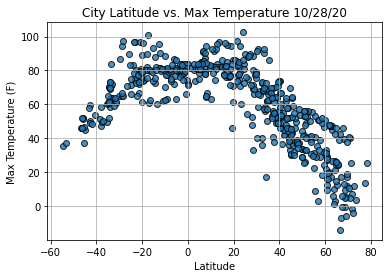

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

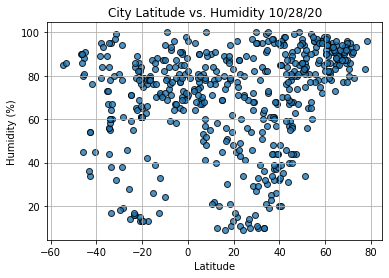

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

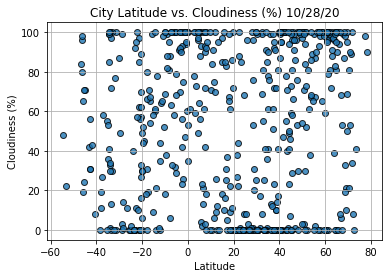

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

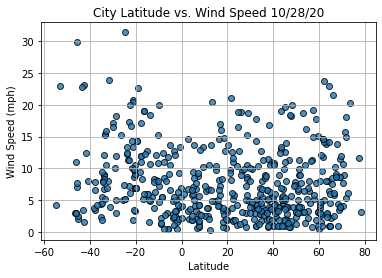

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()